# 통계검정 이론 내용

AB 테스트에서 **Bayesian 통계 검정**은 전통적인 **빈도주의(frequentist)** 방식과는 다른 접근으로, **불확실성**을 **확률적으로** 해석하는 방법입니다. 아래에 개념, 차이점, 수식, 장단점, 실전 사용 예를 단계별로 설명드릴게요.

---

## ✅ 1. 전통적(AKA 빈도주의) AB 테스트 방식 요약

* `p-value`를 기준으로 귀무가설(H0)을 기각할 수 있는지를 판단함.
* 예: “A와 B 그룹의 전환율 차이가 우연히 생겼을 확률이 5% 이하인가?”
* 단점: 유의미한 차이의 크기를 알려주지 않음, 결과 해석이 어렵고 직관적이지 않음.

---

## ✅ 2. 베이지안 AB 테스트란?

베이지안은 **확률**을 "신념의 정도(degree of belief)"로 해석합니다.
즉, 데이터 관측 이후 각 그룹이 얼마나 더 나은지를 **직접적인 확률로** 계산합니다.

### 핵심 요소:

| 요소                | 의미                         |
| ----------------- | -------------------------- |
| Prior (사전 확률)     | 실험 전에 각 그룹의 전환율에 대한 우리의 믿음 |
| Likelihood (우도)   | 관측된 데이터를 주었을 때 결과가 나올 가능성  |
| Posterior (사후 확률) | 데이터를 관측한 후 갱신된 전환율에 대한 믿음  |

$$
\text{Posterior} \propto \text{Prior} \times \text{Likelihood}
$$

---

## ✅ 3. 실험 적용: 예제

* A 그룹: 70 success / 1000
* B 그룹: 90 success / 1000

```python
from scipy.stats import beta
import numpy as np

# 베타 분포로 후행 확률 계산 (Beta prior)
posterior_A = np.random.beta(1 + 70, 1 + 930, 100000)
posterior_B = np.random.beta(1 + 90, 1 + 910, 100000)

# B가 A보다 나을 확률 계산
prob_B_better = np.mean(posterior_B > posterior_A)
```

🧠 **결과 해석**:
"데이터 기반으로 봤을 때 B가 A보다 전환율이 높을 확률은 `prob_B_better * 100%`입니다."

---

## ✅ 4. Bayesian 분석의 장점

| 장점                  | 설명                                |
| ------------------- | --------------------------------- |
| ✅ 직관적 해석            | “B가 A보다 좋을 확률이 93%” 같이 쉽게 말할 수 있음 |
| ✅ 작고 점진적인 실험에 유리    | 작은 트래픽에서도 확률 기반으로 업데이트 가능         |
| ✅ 멀티그룹 비교에 유연       | 그룹이 많아져도 베이지안 방식은 비교가 쉬움          |
| ✅ Early stopping 가능 | 실험 도중 posterior 확률이 확실하면 조기 종료 가능 |

---

## ✅ 5. 주의점 및 단점

| 단점              | 설명                                  |
| --------------- | ----------------------------------- |
| 🔸 사전 분포 선택의 영향 | Prior 설정이 분석 결과에 영향을 줄 수 있음         |
| 🔸 계산량 ↑        | MCMC 또는 수천 번의 샘플링이 필요함              |
| 🔸 표준화 어려움      | 업계 표준이 아직은 빈도주의 기반에 있음 (p-value 중심) |

---

## ✅ 6. 자주 쓰이는 출력 지표

| 지표                               | 설명                                          |
| -------------------------------- | ------------------------------------------- |
| Posterior distribution           | 전환율의 불확실성을 표현하는 확률 분포                       |
| Probability of being best        | 가장 우수할 확률                                   |
| Pairwise superiority probability | A가 B보다 클 확률 (ex. 72%)                       |
| Credible interval                | 신뢰 구간과 비슷하지만, 진짜 "전환율이 x% 범위에 있을 확률"로 해석 가능 |

---

## ✅ 7. 결론 요약

| 항목    | 빈도주의    | 베이지안                       |
| ----- | ------- | -------------------------- |
| 핵심 질문 | 우연일까?   | 누가 더 좋을까?                  |
| 지표    | p-value | posterior probability      |
| 해석    | 기각/채택   | 확률 기반 판단                   |
| 장점    | 명확한 기준  | 직관적인 확률, early stopping 가능 |

---

## 🔍 언제 베이지안 AB 테스트를 사용할까?

* 트래픽이 작고, 실험이 반복적으로 짧게 실행될 때
* 조기 종료 기준이 필요한 실험
* 다양한 그룹을 동시에 비교할 때 (Multi-armed Bandit)
* p-value 보다 \*\*"확률 기반 의사결정"\*\*이 더 직관적일 때

# 예시


######################################################################
📊 My car to Request a Estimate Complete CVR
######################################################################

✅ Group Summary (Successes, Trials, Conversion Rate)


,Group,Successes,Trials,Conversion Rate
0,A,3377,31934,10.57%
1,B,3667,32265,11.37%
2,C,3666,32229,11.37%
3,D,3669,32035,11.45%




✅ Chi-square Test
- Chi2 statistic: 16.4878
- p-value: 0.0009


✅ Pairwise Z-test (Holm-Bonferroni):


,Comparison,Uncorrected p-value,Corrected p-value (Holm),Significant
0,A vs B,0.0014,0.0060,True
1,A vs C,0.0012,0.0060,True
2,A vs D,0.0004,0.0023,True
3,B vs C,0.9694,1.0000,False
4,B vs D,0.7261,1.0000,False
5,C vs D,0.7551,1.0000,False




✅ Pairwise Z-test (FDR - Benjamini-Hochberg):


,Comparison,Uncorrected p-value,Corrected p-value (FDR),Significant (FDR)
0,A vs B,0.0014,0.0027,True
1,A vs C,0.0012,0.0027,True
2,A vs D,0.0004,0.0023,True
3,B vs C,0.9694,0.9694,False
4,B vs D,0.7261,0.9061,False
5,C vs D,0.7551,0.9061,False


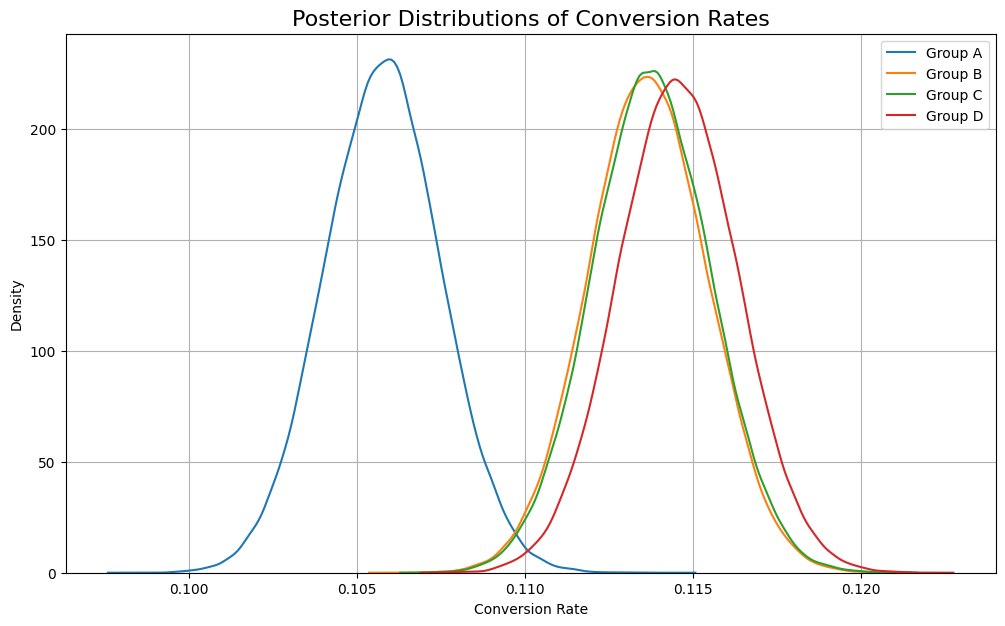



✅ Bayesian: Probability that each group is best
Probability that A is the best: 0.00%
Probability that B is the best: 25.31%
Probability that C is the best: 27.24%
Probability that D is the best: 47.45%


✅ Bayesian Pairwise Superiority Probabilities:


,Comparison,P(Group1 > Group2),P(Group1 < Group2)
0,A > B,0.0006,0.9994
1,A > C,0.0006,0.9994
2,A > D,0.0001,0.9999
3,B > C,0.4838,0.5162
4,B > D,0.3609,0.6391
5,C > D,0.3768,0.6232


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, beta
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multitest import multipletests


# ✅ 전체 float 출력 포맷 소수점 4자리로 고정 (현재 세션에만 적용. python 다시 시작하면 다시 설정해줘야 함.)
pd.set_option('display.float_format', '{:.4f}'.format)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multitest import multipletests

def abtest_multi(groups, successes, trials, metric_name="Metric", samples=100_000):
    failures = trials - successes
    conversion_rates = successes / trials

    # ✅ metric_name 최상단 출력 (큰 제목)
    print("\n" + "#"*70)
    print(f"📊 {metric_name}\n" + "#"*70)
    
    
    # ✅ 그룹별 전환율 출력
    group_summary = pd.DataFrame({
        'Group': groups,
        'Successes': successes,
        'Trials': trials,
        'Conversion Rate': pd.Series(conversion_rates).map(lambda x: f"{x*100:.2f}%")
    })
    print("\n✅ Group Summary (Successes, Trials, Conversion Rate)")
    display(group_summary)
    print(f"\n{'='*60}")

    # for grp, rate in zip(groups, conversion_rates):
    #     print(f"{grp} group conversion rate: {rate:.2%}")

    # ✅ 전통적 통계검정: Chi-square test
    # Chi-square test
    contingency_table = np.array([successes, failures]).T
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print("\n✅ Chi-square Test")
    print(f"- Chi2 statistic: {chi2:.4f}")
    print(f"- p-value: {p_value:.4f}")
    print(f"\n{'='*60}")



    # ✅ 사후 Pairwise Z-test (Holm-Bonferroni 보정)
    # 빈도주의 보수적 방식
    # Pairwise Z-test (Holm-Bonferroni)
    pairwise_results, pairs = [], []
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            count = np.array([successes[i], successes[j]])
            nobs = np.array([trials[i], trials[j]])
            _, p = proportions_ztest(count, nobs)
            pairwise_results.append(p)
            pairs.append(f"{groups[i]} vs {groups[j]}")

    reject, pvals_corrected, _, _ = multipletests(pairwise_results, alpha=0.05, method='holm')
    results_df = pd.DataFrame({
        'Comparison': pairs,
        'Uncorrected p-value': pairwise_results,
        'Corrected p-value (Holm)': pvals_corrected,
        'Significant': reject
    })
    print("\n✅ Pairwise Z-test (Holm-Bonferroni):")
    display(results_df)
    print(f"\n{'='*60}")



    # ✅ 사후 Pairwise Z-test (FDR 보정, 유연한 방식)
    # 빈도주의 유연한 방식
    # Pairwise Z-test (FDR)
    reject_fdr, pvals_fdr_corrected, _, _ = multipletests(pairwise_results, alpha=0.05, method='fdr_bh')
    results_df_fdr = pd.DataFrame({
        'Comparison': pairs,
        'Uncorrected p-value': pairwise_results,
        'Corrected p-value (FDR)': pvals_fdr_corrected,
        'Significant (FDR)': reject_fdr
    })
    print("\n✅ Pairwise Z-test (FDR - Benjamini-Hochberg):")
    display(results_df_fdr)
    print(f"\n{'='*60}")


    # 통계검정 값 고정하기 위한 random seed 고정
    # np.random.seed(42)  # 원하는 정수 사용 -> 베이지안 결과값 고정하기 위함 -> 랜덤 샘플의 시드 고정하는 코드

    # Bayesian analysis
    posterior_samples = {
        group: np.random.beta(1 + success, 1 + fail, samples)    
        for group, success, fail in zip(groups, successes, failures)
    }

    # ✅ Bayesian posterior 분포 시각화
    plt.figure(figsize=(12, 7))
    for group in groups:
        sns.kdeplot(posterior_samples[group], label=f'Group {group}')
    plt.title('Posterior Distributions of Conversion Rates', fontsize=16)
    plt.xlabel('Conversion Rate')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"\n{'='*60}")


    # ✅ Bayesian: 각 그룹이 가장 우수할 확률 계산
    best_group_count = {group: 0 for group in groups}
    for i in range(samples):
        best_group = max(posterior_samples, key=lambda g: posterior_samples[g][i])
        best_group_count[best_group] += 1

    print("\n✅ Bayesian: Probability that each group is best")
    for group, count in best_group_count.items():
        prob = count / samples
        print(f"Probability that {group} is the best: {prob:.2%}")
    print(f"\n{'='*60}")

    # ✅ Bayesian: 쌍별 우위 확률 계산
    # Bayesian pairwise superiority
    pairwise_bayes = []
    for i in range(len(groups)):
        for j in range(i + 1, len(groups)):
            g1, g2 = groups[i], groups[j]
            prob = np.mean(posterior_samples[g1] > posterior_samples[g2])
            pairwise_bayes.append({
                'Comparison': f"{g1} > {g2}",
                'P(Group1 > Group2)': prob,
                'P(Group1 < Group2)': 1 - prob
            })
    df_bayes = pd.DataFrame(pairwise_bayes)
    print("\n✅ Bayesian Pairwise Superiority Probabilities:")
    display(df_bayes)
    print(f"\n{'='*60}")

# Test group 작성
groups = ['A', 'B', 'C', 'D']

# 각 이벤트 별 실험 결과 정리
CNT_TOTAL_PCID = np.array([33359, 33661, 33640, 33555])
CNT_MYCAR_HOME = np.array([33297, 33592, 33578, 33483])
CNT_MYCAR_HOME_ING = np.array([31934, 32265, 32229, 32035])
CNT_REQUEST_ESTIMATE_CLICK1 = np.array([12254, 13832, 12978, 13644])
CNT_REQUEST_ESTIMATE_CLICK2 = np.array([7420, 8251, 7836, 8331])
CNT_ESTIMATE_COMPLETE = np.array([3377, 3667, 3666, 3669])
CNT_READY_TO_SELL_CLICK = np.array([3433, 2808, 5114, 10045])
CNT_READY_TO_SELL_VIEW = np.array([2730, 2213, 3714, 6689])
CNT_READY_TO_SELL_CONFIRM = np.array([1741, 1587, 2162, 3023])
CNT_PRICE_CONFIRM = np.array([1018, 846, 1264, 1754])
CNT_PHOTO_CONFIRM = np.array([1331, 1223, 1527, 1611])
CNT_INFO_CONFIRM = np.array([687, 541, 994, 1868])
CNT_ESTIMATE_CONFIRM = np.array([41, 39, 49, 50])

abtest_multi(groups, CNT_ESTIMATE_COMPLETE, CNT_MYCAR_HOME_ING, metric_name="My car to Request a Estimate Complete CVR")